In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data set and make a copy

In [2]:
cwd       = os.getcwd()
file_path = r"Data\dataset_cleaned.csv"

dataset   = os.path.join(cwd,file_path)

df_original = pd.read_csv(dataset, parse_dates=['TIME'])

df = df_original.copy()

In [3]:
df_original['TIME'] = pd.to_datetime(df_original['TIME'], errors='coerce')
df_original['TIME'].dtype

dtype('<M8[ns]')

## Visualization

In [4]:
df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2023-06-01 00:00:03,2023-05-31 23:59:30,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250
1,2,2023-06-01 00:00:03,2023-05-31 23:59:14,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
2,3,2023-06-01 00:00:03,2023-05-31 23:58:39,BOLTON STREET,20,14,6,OPEN,Bolton Street,53.3512,-6.26986
3,4,2023-06-01 00:00:03,2023-05-31 23:50:47,GREEK STREET,20,6,14,OPEN,Greek Street,53.3469,-6.27298
4,5,2023-06-01 00:00:03,2023-05-31 23:56:14,CHARLEMONT PLACE,40,6,34,OPEN,Charlemont Street,53.3307,-6.26018


In [5]:
df['HOUR'] = df['TIME'].dt.hour
df['DAY']  = df['TIME'].dt.day_name()
df['DAY_OF_WEEK'] = df['TIME'].dt.dayofweek
df['IS_WEEKEND']  = (df['DAY_OF_WEEK'] >=5).astype(int)

df.head()


,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,HOUR,DAY,DAY_OF_WEEK,IS_WEEKEND
0,1,2023-06-01 00:00:03,2023-05-31 23:59:30,CLARENDON ROW,31,31,0,OPEN,Clarendon Row,53.3409,-6.26250,0,Thursday,3,0
1,2,2023-06-01 00:00:03,2023-05-31 23:59:14,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814,0,Thursday,3,0
2,3,2023-06-01 00:00:03,2023-05-31 23:58:39,BOLTON STREET,20,14,6,OPEN,Bolton Street,53.3512,-6.26986,0,Thursday,3,0
3,4,2023-06-01 00:00:03,2023-05-31 23:50:47,GREEK STREET,20,6,14,OPEN,Greek Street,53.3469,-6.27298,0,Thursday,3,0
4,5,2023-06-01 00:00:03,2023-05-31 23:56:14,CHARLEMONT PLACE,40,6,34,OPEN,Charlemont Street,53.3307,-6.26018,0,Thursday,3,0


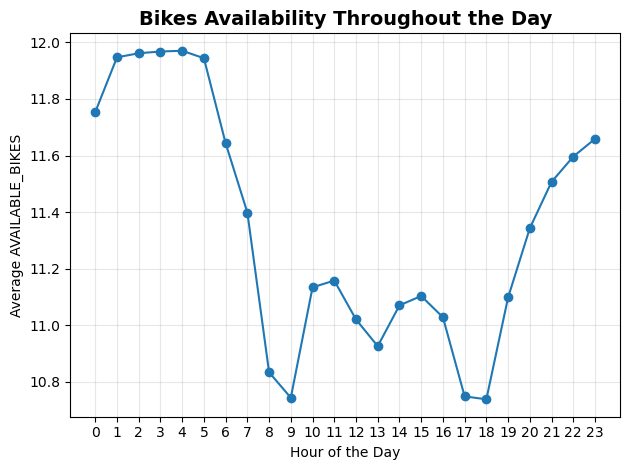

In [6]:
time = df.groupby('HOUR')['HOUR'].mean()
available_bikes = df.groupby("HOUR")['AVAILABLE_BIKES'].mean()

plt.plot(time, available_bikes, marker='o')
plt.title("Bikes Availability Throughout the Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Average AVAILABLE_BIKES")
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig("Outputs/Figures/Availablity of Bikes.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

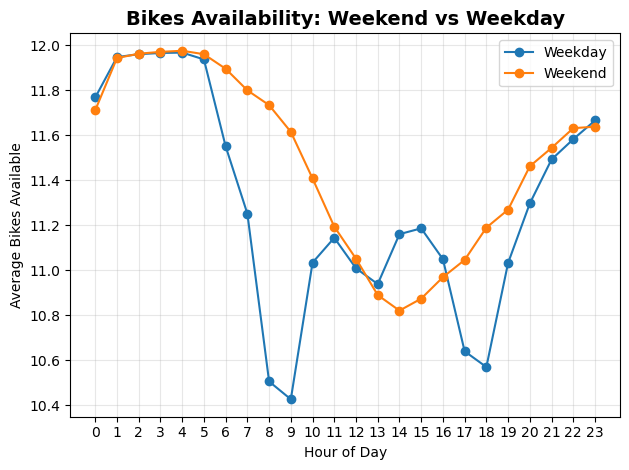

In [7]:
comparison = df.groupby(['IS_WEEKEND','HOUR'])['AVAILABLE_BIKES'].mean().unstack(0)
comparison.columns = ['Weekday', 'Weekend']

plt.figure(figsize=(12, 6))
comparison.plot(marker='o')
plt.title('Bikes Availability: Weekend vs Weekday', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bikes Available')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig("Outputs/Figures/Availablity of Bikes - Weekend_time Vs Weekday.png")
plt.show()


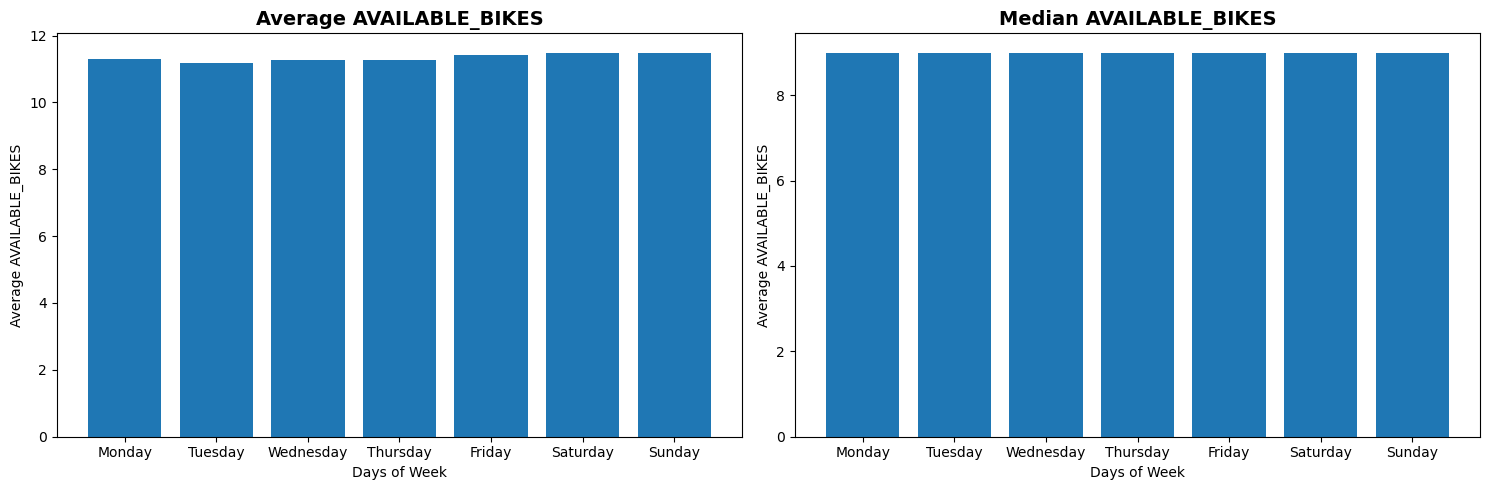

In [8]:
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['DAY']  = pd.Categorical(df['DAY'], categories=week_order, ordered=True)

Avg_Available_bikes = df.groupby("DAY", observed=False)["AVAILABLE_BIKES"].mean()
Median_Available_bikes = df.groupby("DAY", observed=False)["AVAILABLE_BIKES"].median()

Days = Avg_Available_bikes.index.tolist()

fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].bar(Days, Avg_Available_bikes)
axes[0].set_title("Average AVAILABLE_BIKES", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Days of Week")
axes[0].set_ylabel("Average AVAILABLE_BIKES")

axes[1].bar(Days, Median_Available_bikes)
axes[1].set_title("Median AVAILABLE_BIKES", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Days of Week")
axes[1].set_ylabel("Average AVAILABLE_BIKES")

plt.tight_layout()
plt.savefig("Outputs/Figures/Mean & Median Availablity of Bikes.png")
plt.show()

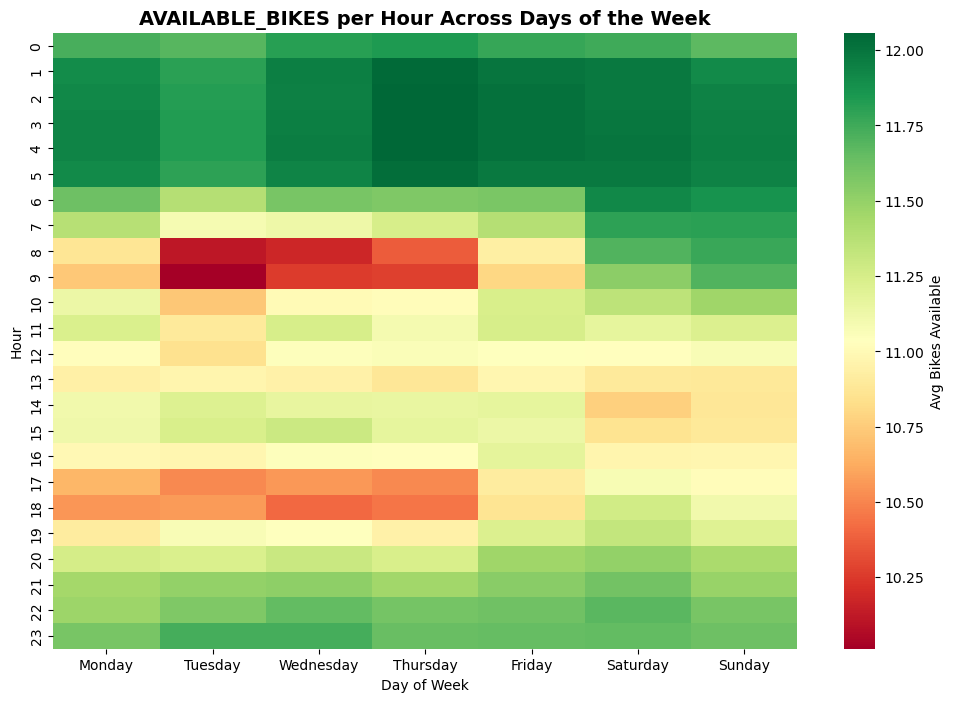

In [9]:
pivot_data = df.pivot_table(
    index="HOUR",
    columns="DAY",
    values="AVAILABLE_BIKES",
    aggfunc="mean",
    observed=False
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_data, annot=False, cmap="RdYlGn", cbar_kws={'label': 'Avg Bikes Available'})
plt.title("AVAILABLE_BIKES per Hour Across Days of the Week", fontsize=14, fontweight='bold')
plt.ylabel("Hour")
plt.xlabel("Day of Week")
plt.savefig("Outputs/Figures/Bikes Availability Heatmap.png")
plt.show() 